In [2]:
!pip install pandas numpy scikit-learn


You should consider upgrading via the 'A:\File\Python\python.exe -m pip install --upgrade pip' command.


In [2]:
import zipfile
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
os.mkdir('dataset')
dataset_dir = 'dataset'

In [5]:
target_file = 'eyedis.zip'
extracting = zipfile.ZipFile(target_file, 'r')
extracting.extractall(dataset_dir)
extracting.close()

In [2]:
import os

# Path ke direktori dataset relatif terhadap lokasi script.py
dataset_dir = 'dataset'

# Menyusun path untuk setiap kategori
cataract_dir = os.path.join(dataset_dir, 'cataract')
diabetic_retinopathy = os.path.join(dataset_dir, 'diabetic_retinopathy')
glaucoma = os.path.join(dataset_dir, 'glaucoma')
normal = os.path.join(dataset_dir, 'normal')

# Menampilkan path untuk memastikan kebenarannya
print(cataract_dir)
print(diabetic_retinopathy)
print(glaucoma)
print(normal)

dataset\cataract
dataset\diabetic_retinopathy
dataset\glaucoma
dataset\normal


In [4]:
!pip install matplotlib

You should consider upgrading via the 'A:\File\Python\python.exe -m pip install --upgrade pip' command.


Cataract Images:


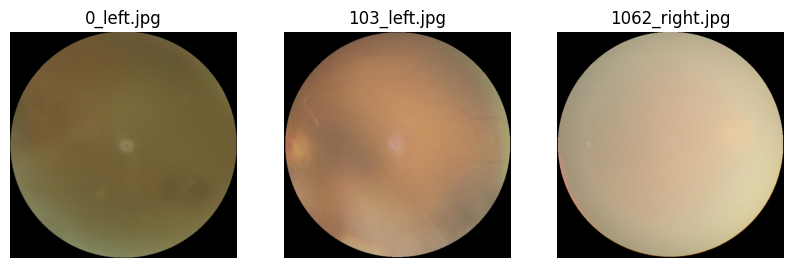

Diabetic Retinopathy Images:


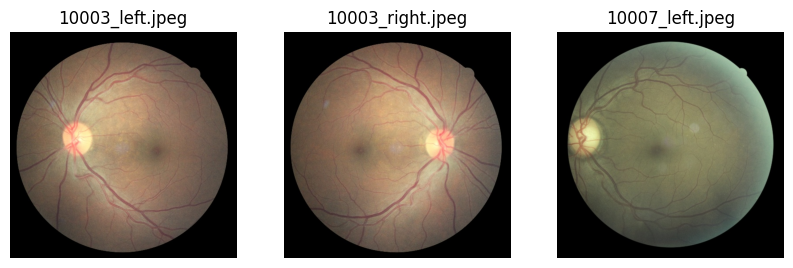

Glaucoma Images:


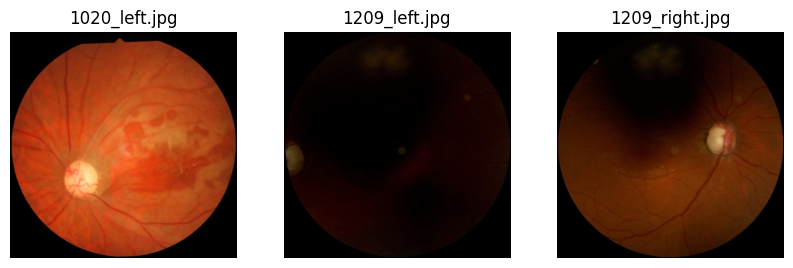

Normal Images:


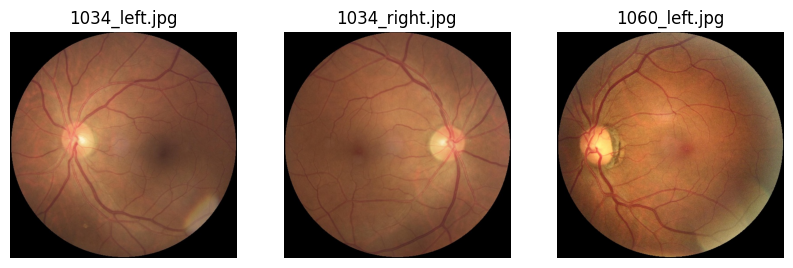

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path ke direktori dataset
##########
dataset_dir = 'dataset/dataset'

# Menyusun path untuk setiap kategori
cataract_dir = os.path.join(dataset_dir, 'cataract')
diabetic_retinopathy = os.path.join(dataset_dir, 'diabetic_retinopathy')
glaucoma = os.path.join(dataset_dir, 'glaucoma')
normal = os.path.join(dataset_dir, 'normal')

# Fungsi untuk menampilkan gambar-gambar
def show_images(image_dir):
    plt.figure(figsize=(10, 10))
    for i, filename in enumerate(os.listdir(image_dir)):
        if i >= 3:  # Hanya menampilkan 3 gambar pertama
            break
        img_path = os.path.join(image_dir, filename)
        img = mpimg.imread(img_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)
    plt.show()

# Menampilkan gambar-gambar untuk setiap kategori
print("Cataract Images:")
show_images(cataract_dir)

print("Diabetic Retinopathy Images:")
show_images(diabetic_retinopathy)

print("Glaucoma Images:")
show_images(glaucoma)

print("Normal Images:")
show_images(normal)


In [13]:
###################################################### MEMBUAT TABLE DATASET #########################################################
import os
import pandas as pd

# Path ke direktori dataset relatif terhadap lokasi script.py
dataset_dir = 'dataset/dataset/'

# Fungsi untuk memuat dataset ke dalam DataFrame
def load_dataset(dataset_dir):
    data = []
    labels = []
    categories = os.listdir(dataset_dir)
    for category in categories:
        category_dir = os.path.join(dataset_dir, category)
        for filename in os.listdir(category_dir):
            file_path = os.path.join(category_dir, filename)
            # Memuat gambar dan labelnya (nama kategori)
            data.append(file_path)
            labels.append(category)
    # Membuat DataFrame dari data dan label
    df = pd.DataFrame({'image_path': data, 'label': labels})
    return df

# Memuat dataset ke dalam DataFrame
dataset_df = load_dataset(dataset_dir)

# Mengecek nilai-nilai yang hilang dalam DataFrame
missing_values = dataset_df.isnull().sum()
print("Nilai-nilai yang hilang dalam dataset:")
print(missing_values)

# Mengecek nilai-nilai yang tidak valid dalam DataFrame (misalnya, nilai kosong dalam kolom 'image_path')
invalid_values = dataset_df[dataset_df.isna().any(axis=1)]
print("Nilai-nilai yang tidak valid dalam dataset:")
print(invalid_values)


Nilai-nilai yang hilang dalam dataset:
image_path    0
label         0
dtype: int64
Nilai-nilai yang tidak valid dalam dataset:
Empty DataFrame
Columns: [image_path, label]
Index: []


In [15]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'a:\File\Python\python.exe -m pip install --upgrade pip' command.


In [ ]:
###################################################### PENGECEKAN DAN ANALISIS

In [22]:
import os
import cv2

# Path ke direktori dataset relatif terhadap lokasi script.py
dataset_dir = 'dataset/dataset/'

# Ekstensi file gambar yang valid
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

# Fungsi untuk memeriksa integritas file gambar
def check_image_integrity(dataset_dir):
    categories = os.listdir(dataset_dir)
    for category in categories:
        category_dir = os.path.join(dataset_dir, category)
        for filename in os.listdir(category_dir):
            file_path = os.path.join(category_dir, filename)
            # Memeriksa apakah entitas dalam direktori adalah file
            if os.path.isfile(file_path):
                # Memeriksa ekstensi file
                if any(filename.endswith(ext) for ext in valid_extensions):
                    # Membaca file gambar dengan OpenCV
                    try:
                        img = cv2.imread(file_path)
                        if img is None:
                            print(f"File tidak dapat dibaca: {file_path}")
                    except Exception as e:
                        print(f"Error saat membaca file: {file_path}, Error: {e}")

# Memeriksa integritas file gambar
check_image_integrity(dataset_dir)
# Memeriksa apakah semua file gambar dapat dibaca
print("Semua file gambar dapat dibaca")


Semua file gambar dapat dibaca


In [23]:
import os
import pandas as pd

# Path ke direktori dataset relatif terhadap lokasi script.py
dataset_dir = 'dataset/dataset/'

# Fungsi untuk membuat DataFrame dari dataset gambar
def create_dataset_df(dataset_dir):
    data = []
    labels = []
    categories = os.listdir(dataset_dir)
    for category in categories:
        category_dir = os.path.join(dataset_dir, category)
        for filename in os.listdir(category_dir):
            file_path = os.path.join(category_dir, filename)
            # Menambahkan informasi path file dan label ke dalam list
            data.append(file_path)
            labels.append(category)
    # Membuat DataFrame dari data dan label
    df = pd.DataFrame({'image_path': data, 'disease': labels})
    return df

# Membuat DataFrame dari dataset gambar
dataset_df = create_dataset_df(dataset_dir)

# Menampilkan 5 baris pertama dari DataFrame
print(dataset_df.head())


                                image_path     label
0      dataset/dataset/cataract\0_left.jpg  cataract
1    dataset/dataset/cataract\103_left.jpg  cataract
2  dataset/dataset/cataract\1062_right.jpg  cataract
3   dataset/dataset/cataract\1083_left.jpg  cataract
4  dataset/dataset/cataract\1084_right.jpg  cataract


In [29]:
dataset_df

,image_path,label
0,dataset/dataset/cataract\0_left.jpg,cataract
1,dataset/dataset/cataract\103_left.jpg,cataract
2,dataset/dataset/cataract\1062_right.jpg,cataract
3,dataset/dataset/cataract\1083_left.jpg,cataract
4,dataset/dataset/cataract\1084_right.jpg,cataract
...,...,...
4212,dataset/dataset/normal\8_right.jpg,normal
4213,dataset/dataset/normal\939_left.jpg,normal
4214,dataset/dataset/normal\939_right.jpg,normal
4215,dataset/dataset/normal\951_left.jpg,normal


In [27]:
checkmissingval = dataset_df.isnull().sum()
print(checkmissingval)

image_path    0
label         0
dtype: int64


In [28]:
label_count = dataset_df.disease.value_counts()
print(label_count)

disease
diabetic_retinopathy    1098
normal                  1078
cataract                1042
glaucoma                1007
Name: count, dtype: int64


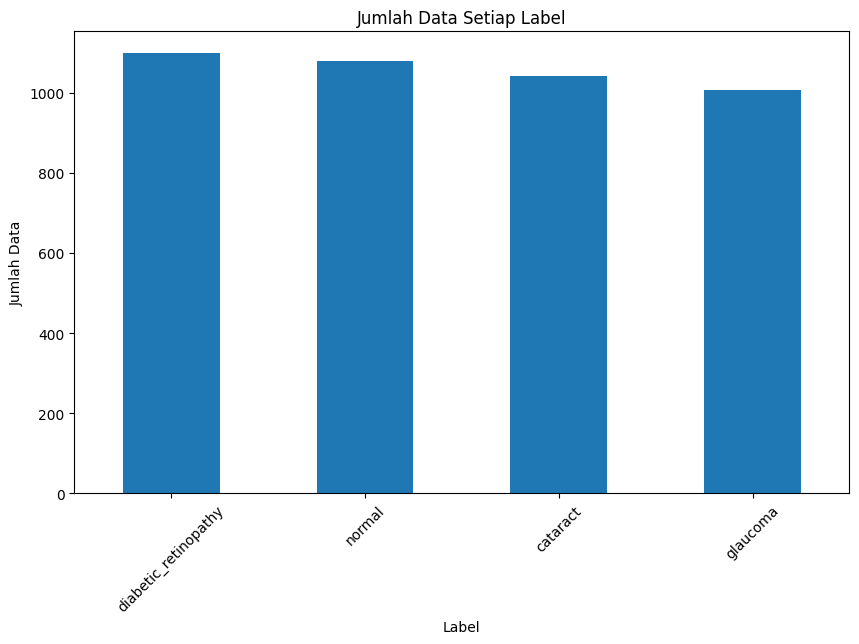

In [30]:
########################################################## visualisasi insight

plt.figure(figsize=(10, 6))
label_count.plot(kind='bar')
plt.title('Jumlah Data Setiap Label')
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.show()


In [ ]:
########################################################### Extraksi Fitur #########################

In [7]:
!pip install tqdm

You should consider upgrading via the 'A:\File\Python\python.exe -m pip install --upgrade pip' command.


In [25]:
################################################# resize normalisasi dan Ekstraksi fitur

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Path ke direktori dataset
dataset_dir = 'dataset/dataset/'

# Membuat DataFrame dari dataset gambar
def create_dataset_df(dataset_dir):
    data = []
    labels = []
    categories = os.listdir(dataset_dir)
    for category in categories:
        category_dir = os.path.join(dataset_dir, category)
        for filename in os.listdir(category_dir):
            file_path = os.path.join(category_dir, filename)
            data.append(file_path)
            labels.append(category)
    df = pd.DataFrame({'image_path': data, 'disease': labels})
    return df

# Resize gambar dan ekstraksi fitur menggunakan VGG16
def resize_and_extract_features(df, image_size=(224, 224)):
    model = VGG16(weights='imagenet', include_top=False)
    features = []
    labels = []

    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing images"):
        img = load_img(row['image_path'], target_size=image_size)
        img_array = img_to_array(img)
        img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)

        # Mengatur verbose menjadi 0 untuk mematikan output yang berlebihan
        feature = model.predict(img_array, verbose=0)
        features.append(feature.flatten())
        labels.append(row['disease'])

    return np.array(features), labels

# Membuat DataFrame dari dataset gambar
dataset_df = create_dataset_df(dataset_dir)

# Resize gambar dan ekstraksi fitur
features, labels = resize_and_extract_features(dataset_df)


Processing images: 100%|██████████| 4225/4225 [1:42:51<00:00,  1.46s/it]


In [10]:
############################################ pengecekan hasil ekstraksi fitur
import os
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi untuk menampilkan ukuran gambar sebelum dan sesudah resizing
def check_resize(image_path, target_size=(224, 224)):
    original_size = Image.open(image_path).size
    resized_size = target_size
    print(f"Ukuran gambar asli: {original_size}, Ukuran gambar setelah resize: {resized_size}")

# Contoh penggunaan
image_path = 'dataset/dataset/diabetic_retinopathy/102_right.jpeg'
check_resize(image_path)


Ukuran gambar asli: (512, 512), Ukuran gambar setelah resize: (224, 224)


In [23]:
########################################################## menyimpan file ekstraksi fitur
import h5py

# Path untuk menyimpan file HDF5
hdf5_file = 'features.h5'

# Fungsi untuk menyimpan fitur ke dalam file HDF5
def save_features_to_hdf5(features, labels, hdf5_file):
    with h5py.File(hdf5_file, 'w') as hf:
        hf.create_dataset('features', data=features)
        hf.create_dataset('labels', data=labels)

# Memanggil fungsi untuk menyimpan fitur ke dalam file HDF5
save_features_to_hdf5(features, labels, hdf5_file)


In [ ]:
###################################################### done #############################################################################